## 作者相关信息

* 作者：Lemonbit
* 个人官网： **liyangbit.com**
* 个人公众号： Python数据之道

文章地址：

* [2018世界杯：用Python分析热门夺冠球队](http://liyangbit.com/projects/projects-world-cup-top3-predict/)

* [第二波分析：德国是2018世界杯夺冠最大热门？ Python数据分析来揭开神秘面纱…](http://liyangbit.com/projects/projects-world-cup-predict-2nd-post)


## International football results from 1872 to 2018

An up-to-date dataset of nearly 40,000 international football results

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

%matplotlib inline
plt.style.use('ggplot')

In [140]:
# 解决matplotlib显示中文问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [141]:
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [142]:
mask = df['home_score'] - df['away_score']
df.loc[mask > 0, 'win_team'] = df.loc[mask > 0, 'home_team']
df.loc[mask < 0, 'win_team'] = df.loc[mask < 0, 'away_team']
df.loc[mask == 0, 'win_team'] = 'Draw'

df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [143]:
df_FIFA_all = df[df['tournament'].str.contains('FIFA', regex=True)]
df_FIFA_all.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,USA
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina


## 世界杯战绩 （含预选赛）

**从前文来看**， 在世界杯历史上，实力最强的5支球队是 德国、阿根廷、巴西、法国、西班牙。

接下来，我们将比赛的范围扩大至包含世界杯预选赛，通过5支球队之间的比赛情况来进行分析。

Top five countries: Germany, Argentina, Brazil, France, Spain

In [144]:
team_top5 = ['Germany', 'Argentina', 'Brazil', 'France', 'Spain']
df_FIFA_top5 = df_FIFA_all[(df_FIFA_all['home_team'].isin(team_top5))&
                                        (df_FIFA_all['away_team'].isin(team_top5))]
df_FIFA_top5

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina
1652,1934-05-27,Brazil,Spain,1,3,FIFA World Cup,Genoa,Italy,True,Spain
3086,1950-07-13,Brazil,Spain,6,1,FIFA World Cup,Rio de Janeiro,Brazil,False,Brazil
4295,1958-06-08,Argentina,Germany,1,3,FIFA World Cup,Malmö,Sweden,True,Germany
4327,1958-06-24,Brazil,France,5,2,FIFA World Cup,Solna,Sweden,True,Brazil
4329,1958-06-28,France,Germany,6,3,FIFA World Cup,Gothenburg,Sweden,True,France
5082,1962-06-06,Brazil,Spain,2,1,FIFA World Cup,Viña del Mar,Chile,True,Brazil
6143,1966-07-13,Argentina,Spain,2,1,FIFA World Cup,Birmingham,England,True,Argentina
6151,1966-07-16,Argentina,Germany,0,0,FIFA World Cup,Birmingham,England,True,Draw
6163,1966-07-20,Germany,Spain,2,1,FIFA World Cup,Birmingham,England,True,Germany


In [145]:
df_FIFA_top5.shape

(43, 10)

在世界杯历史上，5支球队在共有43场比赛相遇。

通过这43场比赛分析后，5支球队的胜负场数排名如下：

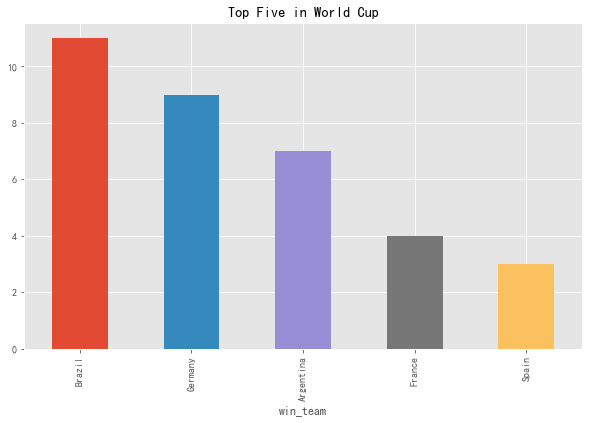

In [146]:
s_FIFA_top5 = df_FIFA_top5.groupby('win_team')['win_team'].count()
s_FIFA_top5.drop('Draw', inplace=True)
s_FIFA_top5.sort_values(ascending=False, inplace=True)
s_FIFA_top5.plot(kind='bar', figsize=(10,6), title='Top Five in World Cup')

下面，着重来分析下这5支球队，在世界杯上，两两对阵时的胜负情况。

首先自定义两个函数，分别获得两支球队获胜场数情况以及自定义绘图函数

In [147]:
# 自定义函数，返回两支球队获胜场数情况
def team_vs(df,team_A,team_B):
    df_team_A_B = df[(df['home_team'].isin([team_A,team_B]))&
                                        (df['away_team'].isin([team_A,team_B]))]
    s_win_team = df_team_A_B.groupby('win_team')['win_team'].count()
    return s_win_team

# 如需获取本文源代码，请关注公众号“Python数据之道”，
# 在公众号后台回复 “code” ，谢谢大家支持。


In [148]:
# 自定义函数，两支球队在世界杯的对阵胜负情况制图
def team_vs_plot(df,team_A,team_B,ax):
    s_win_FIFA = team_vs(df,team_A,team_B)
    title = team_A + ' vs ' +team_B
    s_win_FIFA.plot(kind='bar', ax =ax)
    ax.set_xlabel('')
    ax.set_title(title,fontdict={'fontsize':10})
    ax.set_xticklabels(s_win_FIFA.index, rotation=20)

基于上述函数，分析结果如下：

### 世界杯战绩：巴西 vs 其他4支球队

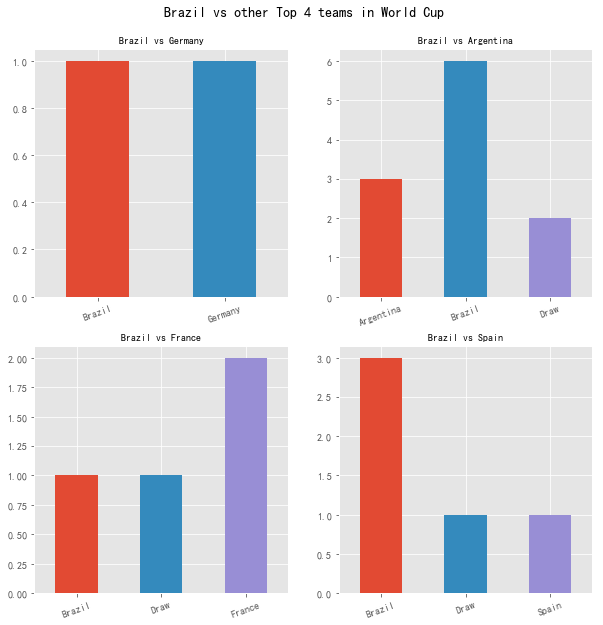

In [149]:
f, axes = plt.subplots(figsize=(10,10), ncols=2, nrows=2)
ax1, ax2,ax3,ax4 = axes.ravel()
team_vs_plot(df_FIFA_all,'Brazil','Germany',ax=ax1)
team_vs_plot(df_FIFA_all,'Brazil','Argentina',ax=ax2)
team_vs_plot(df_FIFA_all,'Brazil','France',ax=ax3)
team_vs_plot(df_FIFA_all,'Brazil','Spain',ax=ax4)

# 如需获取本文源代码，请关注公众号“Python数据之道”，
# 在公众号后台回复 “code” ，谢谢大家支持。

# set main title of the figure
plt.suptitle('Brazil vs other Top 4 teams in World Cup', fontsize=14, fontweight='bold', x=0.5, y=0.94)
plt.show()

**统计现象1：**

在世界杯上的战绩，统计获胜场数如下（不含平局）：

巴西1：1德国，巴西6：3阿根廷，巴西1：2法国，巴西3：1西班牙

巴西队，输赢不好判断……

### 世界杯战绩：德国 vs 其他3支球队

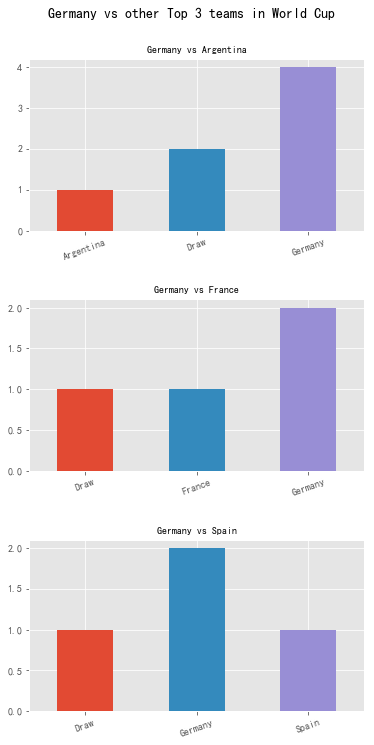

In [150]:
f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=3)
ax1,ax2,ax3 = axes.ravel()

team_vs_plot(df_FIFA_all,'Germany','Argentina',ax=ax1)
team_vs_plot(df_FIFA_all,'Germany','France',ax=ax2)
team_vs_plot(df_FIFA_all,'Germany','Spain',ax=ax3)

plt.subplots_adjust(hspace = 0.4)
# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
# default values
# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

# 如需获取本文源代码，请关注公众号“Python数据之道”，
# 在公众号后台回复 “code” ，谢谢大家支持。

# set main title of the figure
plt.suptitle('Germany vs other Top 3 teams in World Cup', fontsize=14, fontweight='bold', x=0.5, y=0.94)
plt.show()

**统计现象2：**

在世界杯上的战绩，统计获胜场数如下（不含平局）：

德国4：1阿根廷，德国2：1法国，德国2：1西班牙

德国在这5支持球队里，获胜的优势相对比较明显。

### 世界杯战绩：阿根廷 vs 其他2支球队

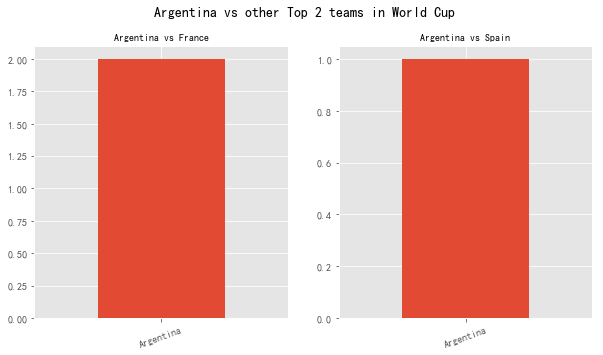

In [151]:
f, axes = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
ax1,ax2 = axes.ravel()

team_vs_plot(df_FIFA_all,'Argentina','France',ax=ax1)
team_vs_plot(df_FIFA_all,'Argentina','Spain',ax=ax2)

# plt.subplots_adjust(hspace = 0.4)
# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
# default values
# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

# set main title of the figure
plt.suptitle('Argentina vs other Top 2 teams in World Cup', fontsize=14, fontweight='bold', x=0.5, y=0.99)
plt.show()

**统计现象3：**

在世界杯上的战绩，统计获胜场数如下（不含平局）：

阿根廷2：0法国，阿根廷1：0西班牙

但阿根廷不敌巴西和德国

### 世界杯战绩：西班牙 vs 法国

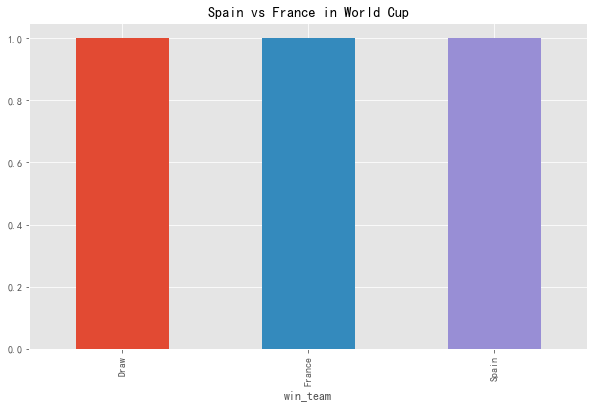

In [152]:
s_win_FIFA_Spain_France = team_vs(df_FIFA_all,'Spain', 'France')
s_win_FIFA_Spain_France.plot(kind='bar', figsize=(10,6), title='Spain vs France in World Cup')

**结论：** 从历届世界杯上的表现情况来看，分析5强之间两两对阵后，发现德国队的表现是最好的。其次巴西和阿根廷的表现也不错。

考虑到，历届世界杯的数据，时间跨度很大，很多球队其实已经发生了很大变化。

球队真实的情况，可能选择近几年的比赛，以及包含不同级别的比赛，可能分析效果要更好些。

下面，重点来分析2014年以来包含所有比赛的情况。

## 2014年以来，所有比赛的战绩对比

首先，时间选择2014年之后（含2014年），距离现在的时间比较近，相对来说，球队人员的组成变化小一些。

当然，这里的时间选择，对于结果是有影响的。 大家可以探讨下这个因素带来的影响。


### 2014年以来所有球队所有比赛胜负情况概览

首先，我们来看看自2014年以来所有球队（国家队）所有比赛的胜负情况（以场数计），以便有一个大概的预期。

In [153]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df_since_2014 = df[df['year']>=2014]
df_since_2014

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team,year
35238,2014-01-01,Kuwait,Jordan,1,2,WAFF Championship,Doha,Qatar,True,Jordan,2014
35239,2014-01-04,Bahrain,Jordan,0,1,WAFF Championship,Doha,Qatar,True,Jordan,2014
35240,2014-01-04,Namibia,Ghana,0,1,Friendly,Windhoek,Namibia,False,Ghana,2014
35241,2014-01-04,Nigeria,Ethiopia,2,1,Friendly,Abuja,Nigeria,False,Nigeria,2014
35242,2014-01-04,Qatar,Kuwait,3,0,WAFF Championship,Doha,Qatar,False,Qatar,2014
35243,2014-01-07,Bahrain,Kuwait,0,0,WAFF Championship,Doha,Qatar,True,Draw,2014
35244,2014-01-07,Qatar,Jordan,2,0,WAFF Championship,Doha,Qatar,False,Qatar,2014
35245,2014-01-07,Zimbabwe,Gabon,2,0,Friendly,Johannesburg,South Africa,True,Zimbabwe,2014
35246,2014-01-11,Mali,Nigeria,2,1,African Nations Championship,Cape Town,South Africa,True,Mali,2014
35247,2014-01-11,South Africa,Mozambique,3,1,African Nations Championship,Cape Town,South Africa,False,South Africa,2014


In [154]:
df_since_2014.shape

(3691, 11)

2014年以来，共有3600多场比赛。

针对3600多场比赛分析后，胜负场数情况如下：

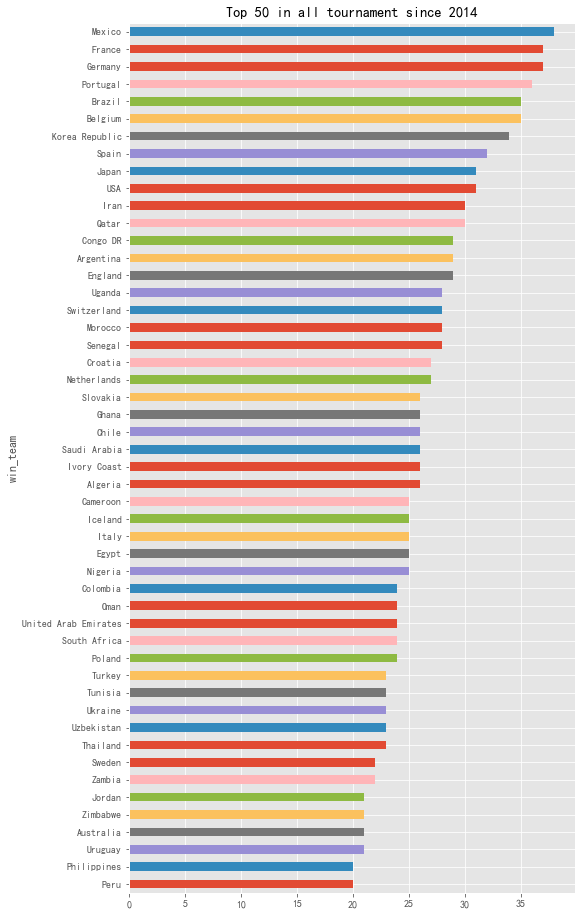

In [155]:
s_all = df_since_2014.groupby('win_team')['win_team'].count()
s_all.drop('Draw', inplace=True)
s_all.sort_values(ascending=True, inplace=True)
s_all.tail(50).plot(kind='barh', figsize=(8,16), tick_label='',title='Top 50 in all tournament since 2014')

从上图来看，**2014年以来，墨西哥，法国，德国、葡萄牙、巴西、比利时、韩国和西班牙表现相对较好。**

结果是不是跟想象中的有些差异？ 

6月17日的小组赛，德国不敌墨西哥，看来也不是全无理由的。

但是，**本次我们主要还是要考虑32强之间的对阵，这样更能反映现实情况。**

### 2014年以来32强相互之间在所有比赛中的概览情况

In [156]:
team_list = ['Russia', 'Germany', 'Brazil', 'Portugal', 'Argentina', 'Belgium', 'Poland', 'France', 
             'Spain', 'Peru', 'Switzerland', 'England', 'Colombia', 'Mexico', 'Uruguay', 'Croatia',
            'Denmark', 'Iceland', 'Costa Rica', 'Sweden', 'Tunisia', 'Egypt', 'Senegal', 'Iran',
            'Serbia', 'Nigeria', 'Australia', 'Japan', 'Morocco', 'Panama', 'Korea Republic', 'Saudi Arabia']

df_top32 = df_since_2014[(df_since_2014['home_team'].isin(team_list))&(df_since_2014['away_team'].isin(team_list))]
df_top32

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team,year
35272,2014-01-21,Iceland,Sweden,0,2,Friendly,Abu Dhabi,United Arab Emirates,True,Sweden,2014
35277,2014-01-25,Costa Rica,Korea Republic,0,1,Friendly,Los Angeles,USA,True,Korea Republic,2014
35279,2014-01-25,Morocco,Nigeria,3,4,African Nations Championship,Cape Town,South Africa,True,Nigeria,2014
35282,2014-01-29,Mexico,Korea Republic,4,0,Friendly,San Antonio,USA,True,Mexico,2014
35306,2014-03-05,Colombia,Tunisia,1,1,Friendly,Barcelona,Spain,True,Draw,2014
35309,2014-03-05,England,Denmark,1,0,Friendly,London,England,False,England,2014
35345,2014-03-05,Switzerland,Croatia,2,2,Friendly,Sankt Gallen,Switzerland,False,Draw,2014
35372,2014-05-13,Germany,Poland,0,0,Friendly,Hamburg,Germany,False,Draw,2014
35429,2014-05-28,Denmark,Sweden,1,0,Friendly,Copenhagen,Denmark,False,Denmark,2014
35430,2014-05-28,Korea Republic,Tunisia,0,1,Friendly,Seoul,Korea Republic,False,Tunisia,2014


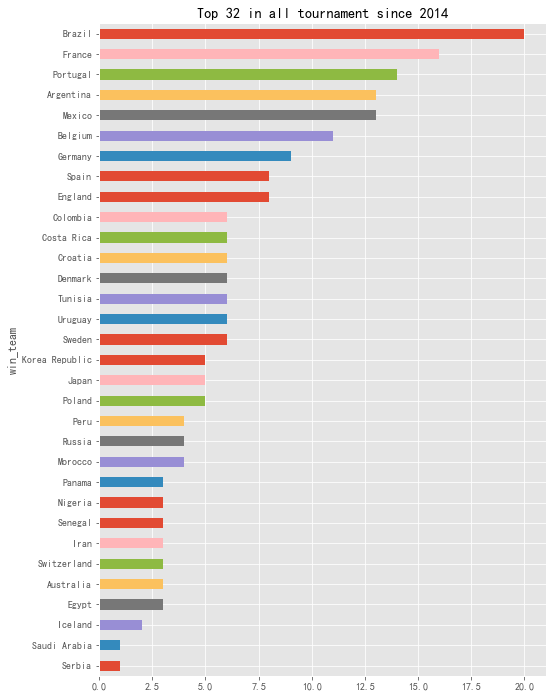

In [157]:
s_top32 = df_top32.groupby('win_team')['win_team'].count()
s_top32.drop('Draw', inplace=True)
s_top32.sort_values(ascending=True, inplace=True)
s_top32.plot(kind='barh', figsize=(8,12), tick_label='',title='Top 32 in all tournament since 2014')
# plt.ylabel('')

从上图来看，自2014年以来，**巴西、法国、葡萄牙、阿根廷、墨西哥、比利时、德国、西班牙、英国为前9强**。下面我们来分析top9之间的胜负情况。

In [158]:
team_top9 = [ 'Brazil', 'France', 'Portugal', 
             'Argentina','Mexico','Belgium',
             'Germany','Spain','England']
df_top9 = df_since_2014[(df_since_2014['home_team'].isin(team_top9))&
                        (df_since_2014['away_team'].isin(team_top9))]
df_top9

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team,year
35509,2014-06-06,Mexico,Portugal,0,1,Friendly,Foxborough,USA,True,Portugal,2014
35536,2014-06-16,Germany,Portugal,4,0,FIFA World Cup,Salvador,Brazil,True,Germany,2014
35540,2014-06-17,Brazil,Mexico,0,0,FIFA World Cup,Fortaleza,Brazil,False,Draw,2014
35588,2014-07-04,France,Germany,0,1,FIFA World Cup,Rio de Janeiro,Brazil,True,Germany,2014
35589,2014-07-05,Argentina,Belgium,1,0,FIFA World Cup,Brasília,Brazil,True,Argentina,2014
35592,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False,Germany,2014
35597,2014-07-13,Germany,Argentina,1,0,FIFA World Cup,Rio de Janeiro,Brazil,True,Germany,2014
35645,2014-09-03,Germany,Argentina,2,4,Friendly,Düsseldorf,Germany,False,Argentina,2014
35661,2014-09-04,France,Spain,1,0,Friendly,Saint-Denis,France,False,France,2014
35803,2014-10-11,Argentina,Brazil,0,2,Friendly,Beijing,China,True,Brazil,2014


In [159]:
df_top9.shape

(44, 11)

2014年以来，top 9 之间一共踢了44场比赛（包括友谊赛）。

总体来说，比赛的场数不是太多，基于这些数据来分析，可能对结果会有较大的影响。

九强排名如下：

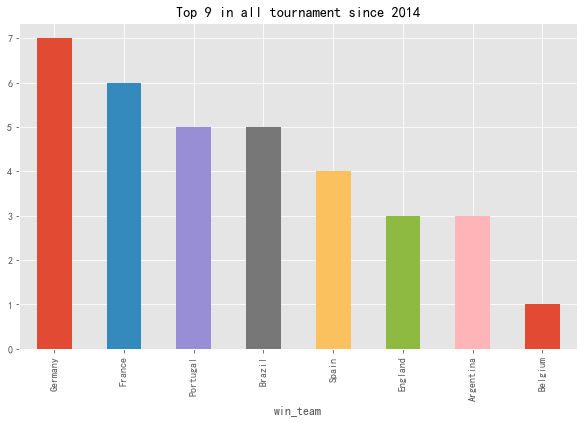

In [160]:
s_top9 = df_top9.groupby('win_team')['win_team'].count()
s_top9.drop('Draw', inplace=True)
s_top9.sort_values(ascending=False, inplace=True)
s_top9.plot(kind='bar', figsize=(10,6), title='Top 9 in all tournament since 2014')

**来查看下都统计了哪些类型的比赛**

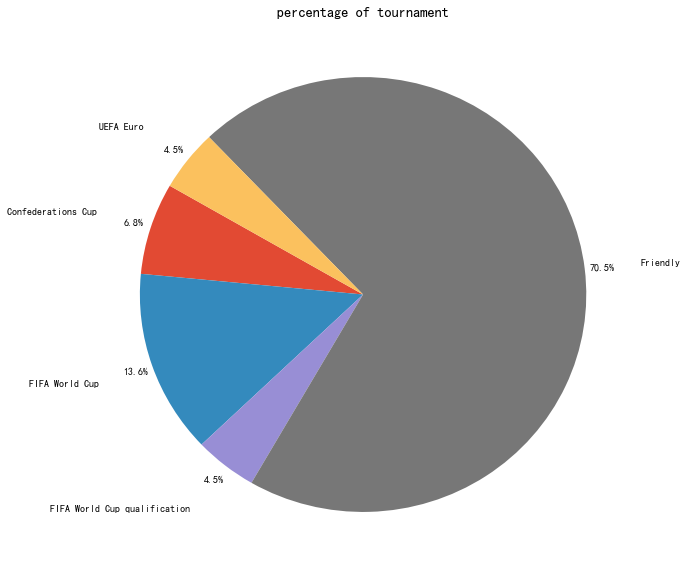

In [162]:
s_tournament = df_top9.groupby('tournament')['tournament'].count()
s_tournament_percentage = s_tournament/s_tournament.sum()
# s_tournament_percentage.sort_values(ascending=False, inplace=True)
s_tournament_percentage.tail(20).plot(kind='pie', figsize=(10,10), autopct='%.1f%%', 
                           startangle=150, title='percentage of tournament', label='',
                                     labeldistance=1.25, pctdistance=1.08)

考虑到友谊赛在有些情况下可能不能比较准确的反映出球队的真实水平，且友谊赛站的场数比例较大，我们剔除友谊赛再来看看结果情况。

### 2014年以来32强剔除友谊赛后的胜负情况概览

In [165]:
df_top9_no_friendly = df_top9[df_top9['tournament']!= 'Friendly']
df_top9_no_friendly.groupby('tournament')['tournament'].count()

tournament
Confederations Cup              3
FIFA World Cup                  6
FIFA World Cup qualification    2
UEFA Euro                       2
Name: tournament, dtype: int64

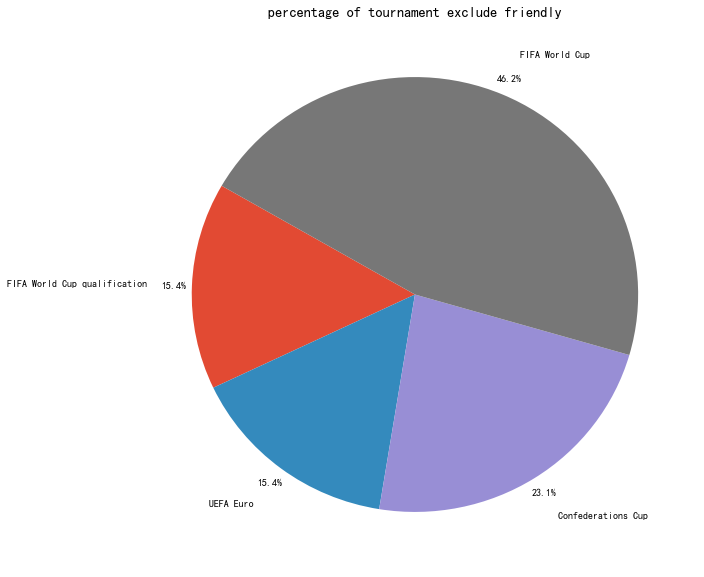

In [166]:
s_tournament_exclude_friendly = df_top9_no_friendly.groupby('tournament')['tournament'].count()
s_tournament_percentage_exclude_friendly = s_tournament_exclude_friendly/s_tournament_exclude_friendly.sum()
s_tournament_percentage_exclude_friendly.sort_values(ascending=True, inplace=True)
s_tournament_percentage_exclude_friendly.plot(kind='pie', figsize=(10,10), autopct='%.1f%%', 
                                              startangle=150, title='percentage of tournament exclude friendly', 
                                              label='',labeldistance=1.2, pctdistance=1.08)

In [167]:
df_top9_no_friendly

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team,year
35536,2014-06-16,Germany,Portugal,4,0,FIFA World Cup,Salvador,Brazil,True,Germany,2014
35540,2014-06-17,Brazil,Mexico,0,0,FIFA World Cup,Fortaleza,Brazil,False,Draw,2014
35588,2014-07-04,France,Germany,0,1,FIFA World Cup,Rio de Janeiro,Brazil,True,Germany,2014
35589,2014-07-05,Argentina,Belgium,1,0,FIFA World Cup,Brasília,Brazil,True,Argentina,2014
35592,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False,Germany,2014
35597,2014-07-13,Germany,Argentina,1,0,FIFA World Cup,Rio de Janeiro,Brazil,True,Germany,2014
36894,2015-11-13,Argentina,Brazil,1,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,Draw,2015
37510,2016-07-07,France,Germany,2,0,UEFA Euro,Marseille,France,False,France,2016
37511,2016-07-10,France,Portugal,0,1,UEFA Euro,Saint-Denis,France,False,Portugal,2016
37793,2016-11-10,Brazil,Argentina,3,0,FIFA World Cup qualification,Belo Horizonte,Brazil,False,Brazil,2016


In [168]:
df_top9_no_friendly.shape

(13, 11)

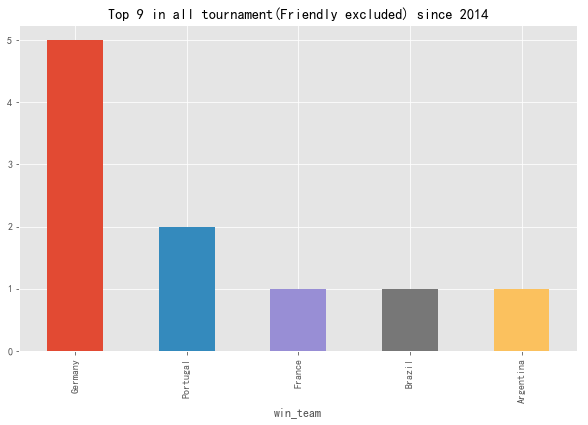

In [169]:
s_top9_no_friendly = df_top9_no_friendly.groupby('win_team')['win_team'].count()
s_top9_no_friendly.drop('Draw', inplace=True)
s_top9_no_friendly.sort_values(ascending=False, inplace=True)
s_top9_no_friendly.plot(kind='bar', figsize=(10,6), title='Top 9 in all tournament(Friendly excluded) since 2014')

在概览中可以看出，是否剔除友谊赛（Friendly），对排名还是有影响的。

另外，剔除友谊赛后，总的比赛场数更少了（只有13场），9强之间有些队伍没有比赛，或者没有赢过，这个数据用来分析的作用更有限。 

当然，在分析中**是否要剔除友谊赛，应该是值得商榷的。**

这里，我们后续分析采用包含友谊赛的数据，来分别分析9强之间两两对阵的情况，看看哪支球队的胜率更高些。

**自定义获取球队某年至今获胜比例函数**

In [170]:
# 自定义获取球队某年至今获胜比例函数
def probability(df,year,team_A,team_B):
    prob = []
    df_year = df[df['year']>= year]
    s = team_vs(df_year,team_A,team_B)
    s_team_A = 0 if s.get(team_A) is None else s.get(team_A)
    s_A_win = s_team_A/s.sum()
    s_team_B = 0 if s.get(team_B) is None else s.get(team_B)
    s_B_win = s_team_B/s.sum()
    s_draw = 1 - s_A_win - s_B_win
    prob.append(year)
    prob.append(s_A_win)
    prob.append(s_B_win)
    prob.append(s_draw)
#     print('{0} vs {1} since {2}'.format(team_A,team_B,year))
#     print('Probability of {0} winning: {1:.2%}'.format(team_A, s_A_win))
#     print('Probability of {0} winning: {1:.2%}'.format(team_B, s_B_win))
#     print('Probability of draw: {0:.2%}'.format(s_draw))   
    return prob
  

**自定义获取两支球队历史获胜情况对比函数**

In [171]:
# 自定义获取两支球队历史获胜情况对比函数
def his_team_data(df,year_start,year_end,team_A,team_B):
    row_team = []
#     df_team = pd.DataFrame(columns=('year', 'team_A_win', 'team_B_win', 'draw'))
    for yr in list(range(year_start,year_end+1)):
        team_A_vs_team_B = probability(df,yr,team_A,team_B)
        row_team.append(team_A_vs_team_B) 
    team_A_win = team_A + '_win_percentage'
    team_B_win = team_B + '_win_percentage'
    df_team = pd.DataFrame(row_team, columns=('year', team_A_win, team_B_win, 'draw_percentage'))
    return df_team


**自定义两支球队历史获胜情况制图函数**

In [172]:
# 自定义两支球队历史获胜情况制图函数
def team_plot(df,year_start,year_end,team_A,team_B,ax):
    team_A_vs_team_B = team_A + '_vs_' + team_B
    team_A_vs_team_B = his_team_data(df,year_start,year_end,team_A,team_B)
    title = team_A + ' vs ' + team_B
    columns = [team_A+'_win_percentage',team_B+'_win_percentage','draw_percentage']
    team_A_vs_team_B.set_index('year')[columns].plot(kind='line',figsize=(10,6), title=title,ax=ax)

### 巴西 vs 德国

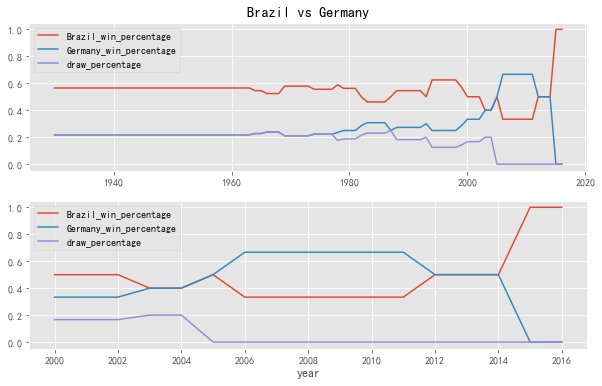

In [173]:
team_A = 'Brazil'
team_B = 'Germany'

f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
ax1, ax2 = axes.ravel()

team_plot(df,1930,2016,team_A,team_B,ax1)
ax1.set_xlabel('')
team_plot(df,2000,2016,team_A,team_B,ax2)
ax2.set_title('')

plt.show()

### 德国 vs 8支球队

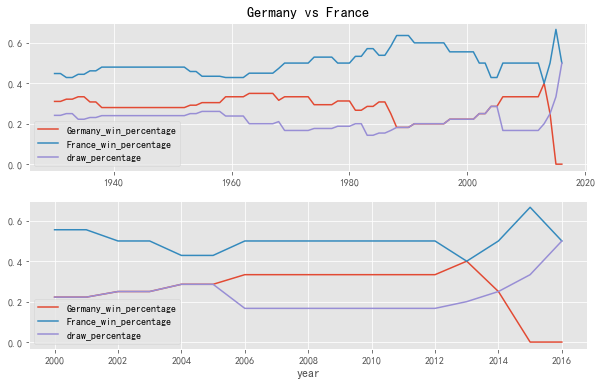

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


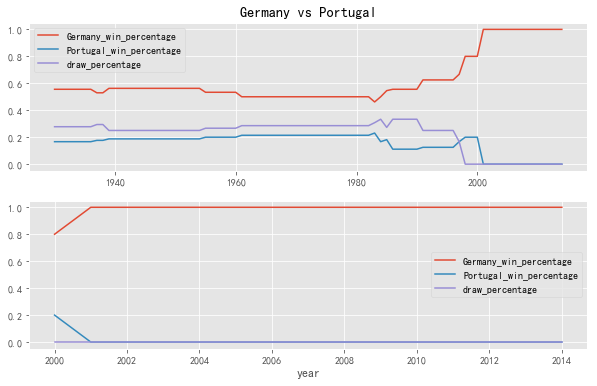

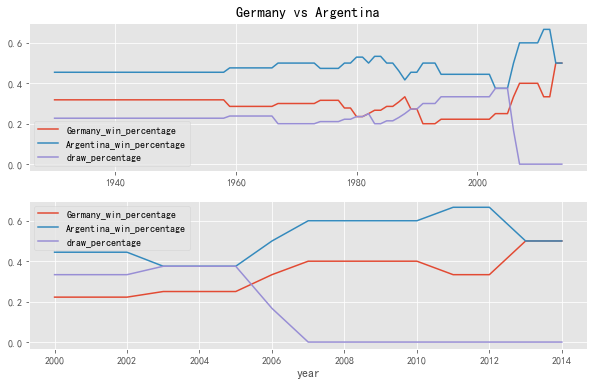

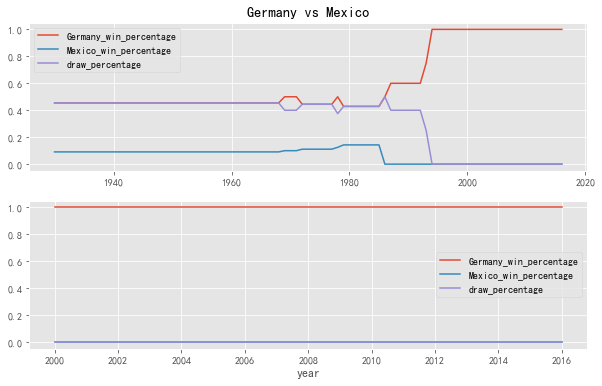

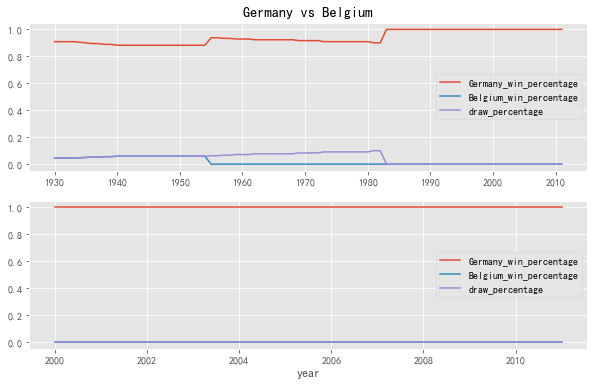

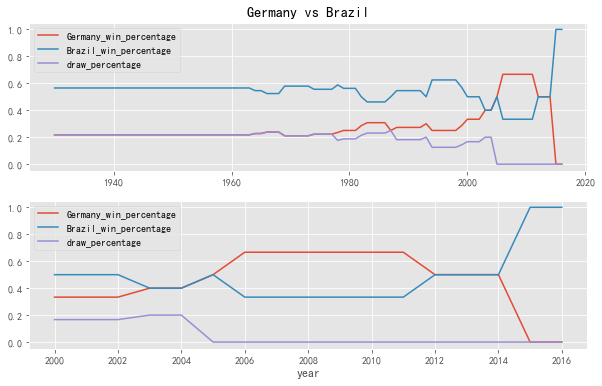

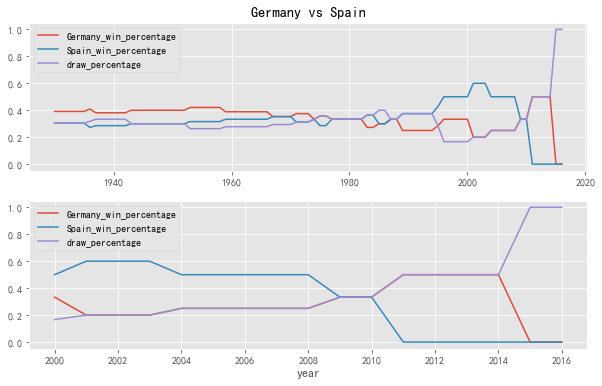

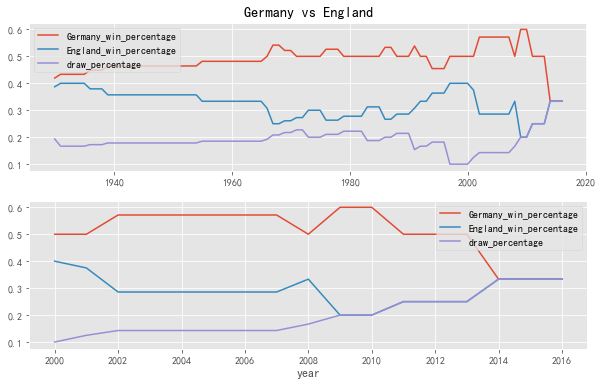

In [174]:
team_A = 'Germany'

for team in ['France','Portugal', 'Argentina','Mexico','Belgium','Brazil','Spain','England']:
    team_B = team

    f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
    ax1, ax2 = axes.ravel()

    team_plot(df,1930,2016,team_A,team_B,ax1)
    ax1.set_xlabel('')
    team_plot(df,2000,2016,team_A,team_B,ax2)
    ax2.set_title('')

    plt.show()

### 巴西 vs 8支球队

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


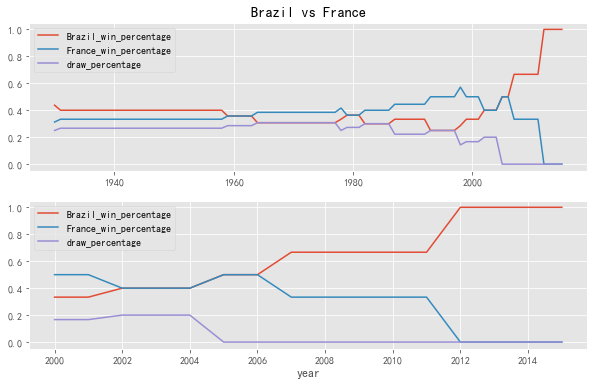

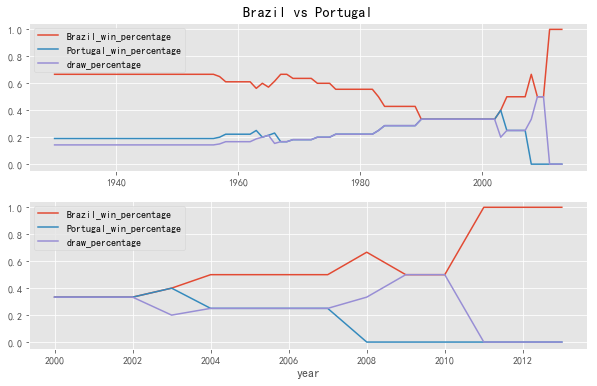

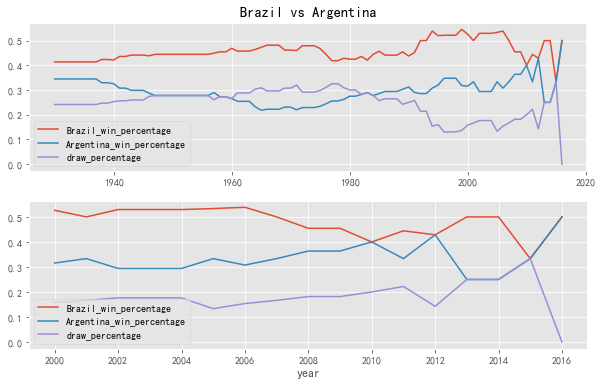

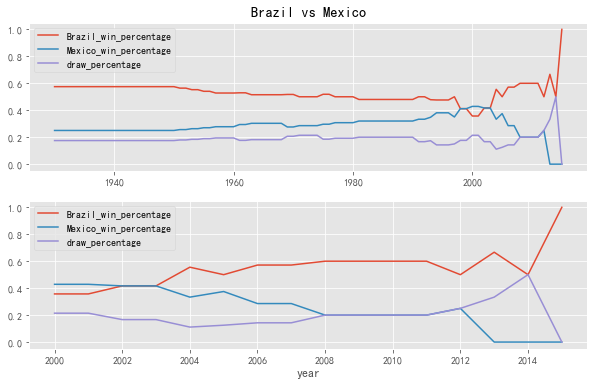

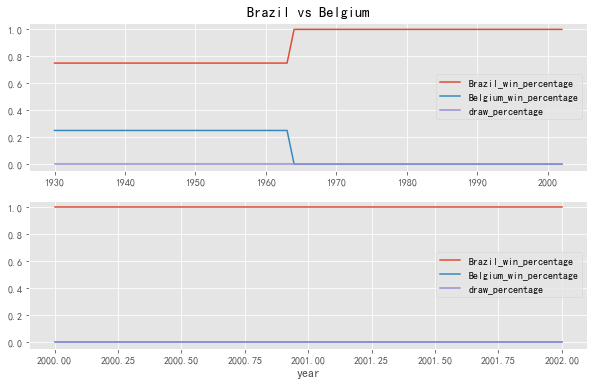

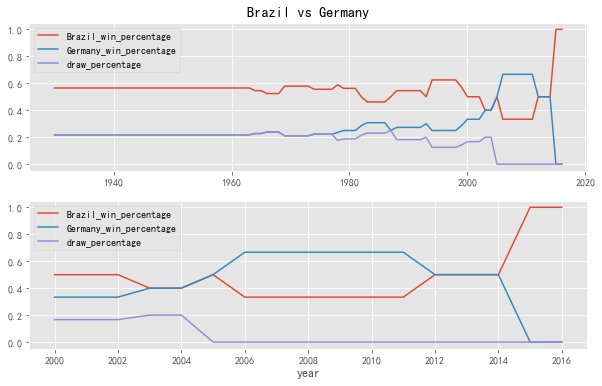

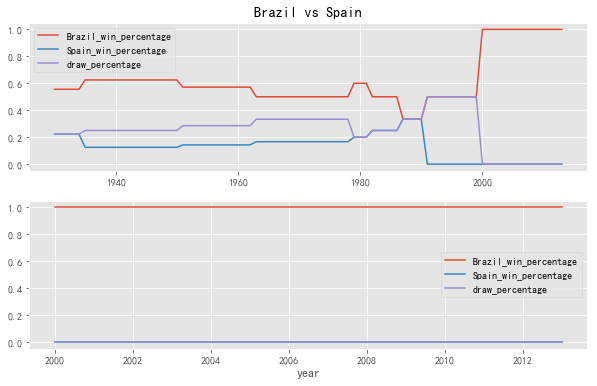

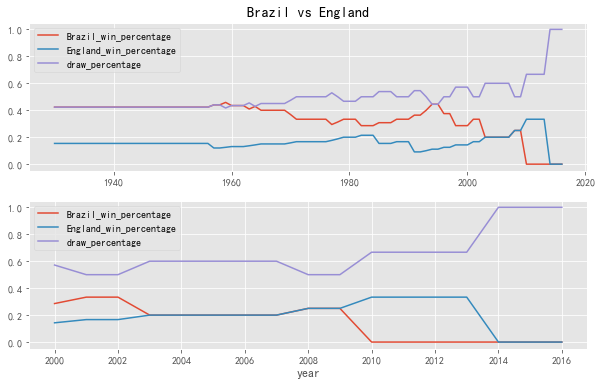

In [175]:
team_A = 'Brazil'

for team in ['France','Portugal', 'Argentina','Mexico','Belgium','Germany','Spain','England']:
    team_B = team

    f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
    ax1, ax2 = axes.ravel()

    team_plot(df,1930,2016,team_A,team_B,ax1)
    ax1.set_xlabel('')
    team_plot(df,2000,2016,team_A,team_B,ax2)
    ax2.set_title('')

    plt.show()

### 法国 vs 7支球队

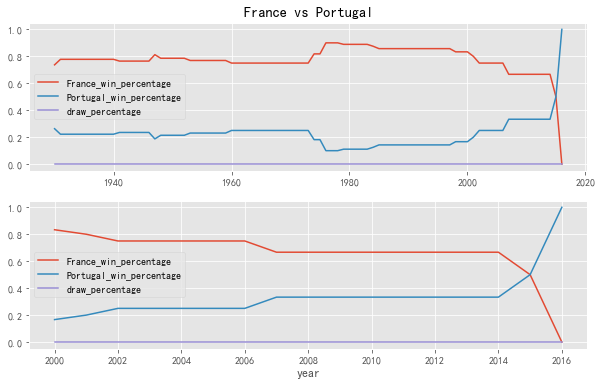

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


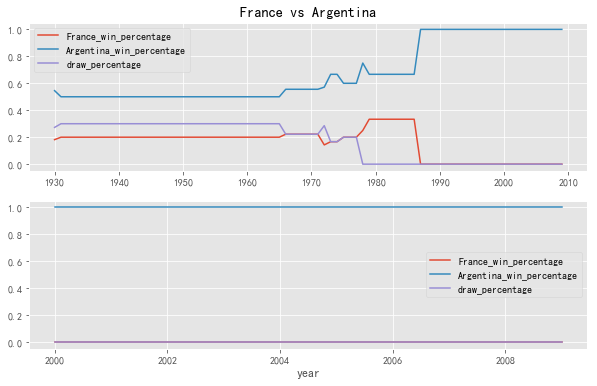

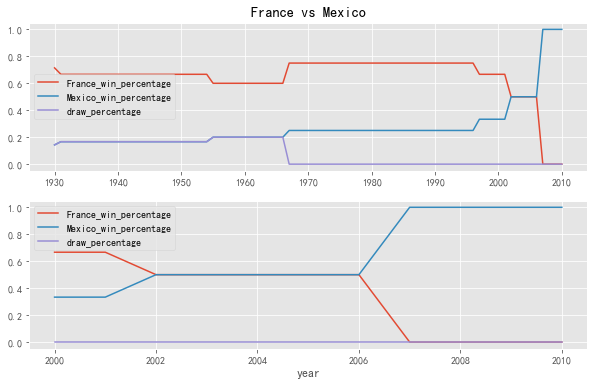

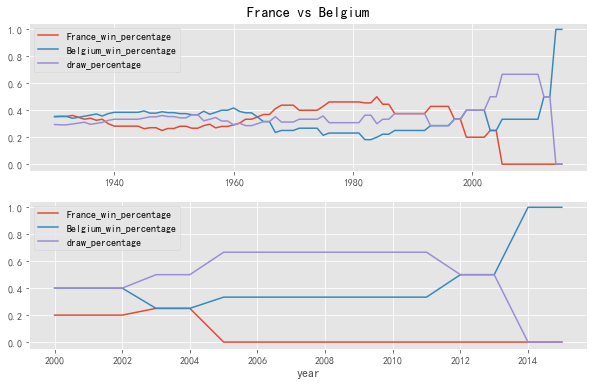

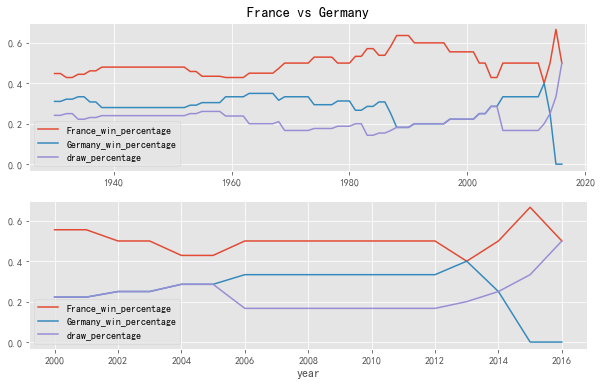

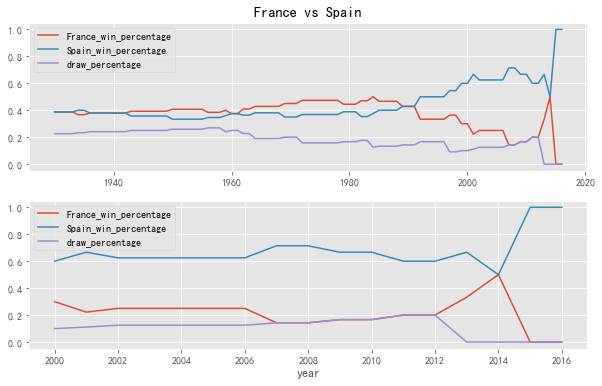

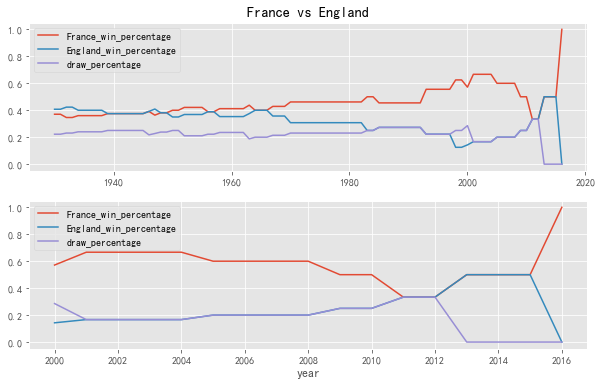

In [176]:
team_A = 'France'

for team in ['Portugal',  'Argentina','Mexico','Belgium','Germany','Spain','England']:
    team_B = team

    f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
    ax1, ax2 = axes.ravel()

    team_plot(df,1930,2016,team_A,team_B,ax1)
    ax1.set_xlabel('')
    team_plot(df,2000,2016,team_A,team_B,ax2)
    ax2.set_title('')

    plt.show()

### 葡萄牙 vs 6支球队

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


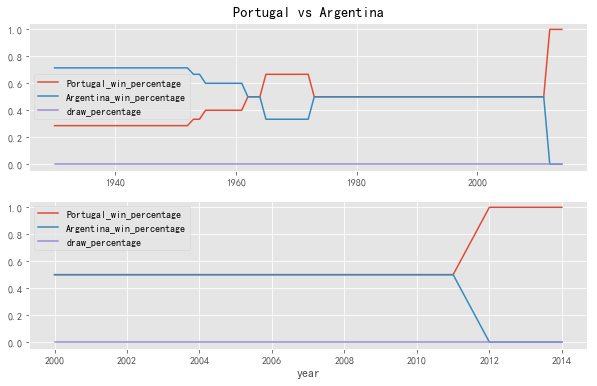

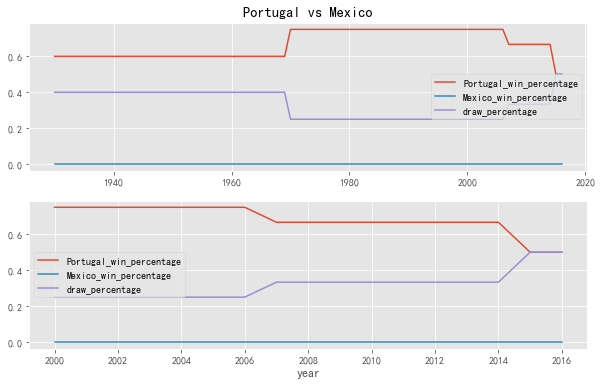

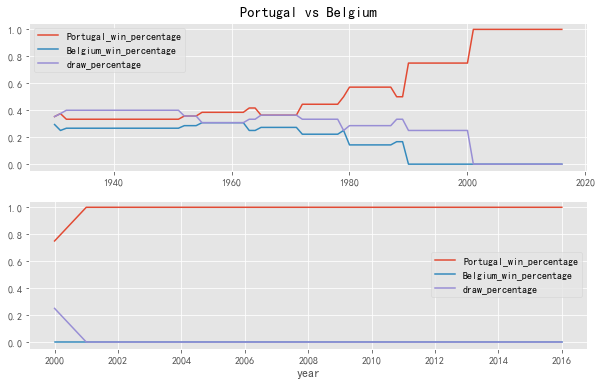

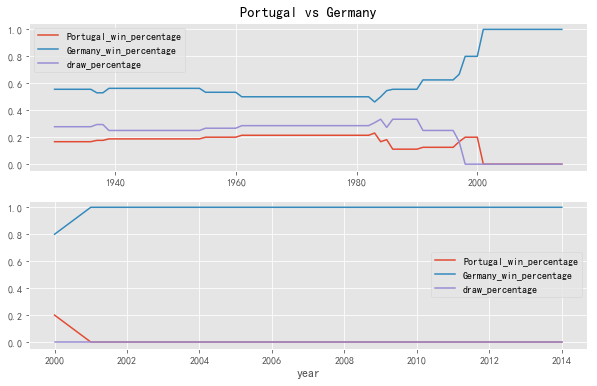

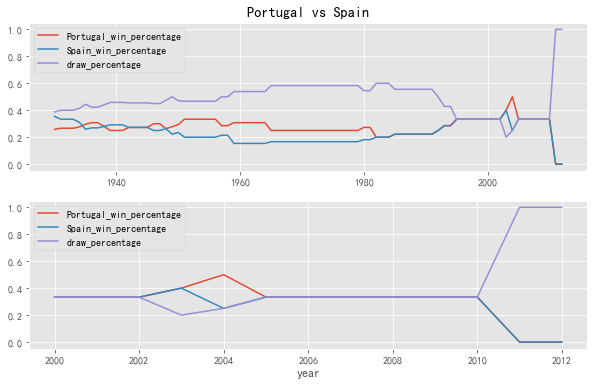

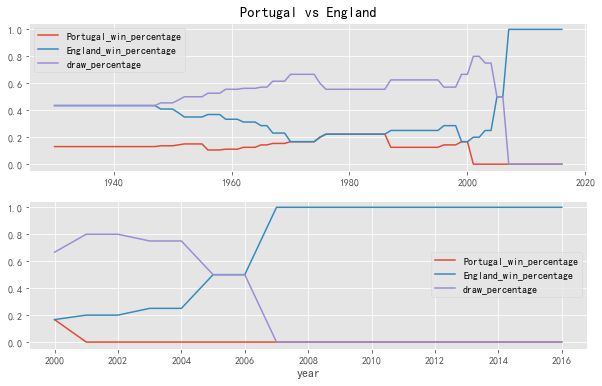

In [177]:
team_A = 'Portugal'

for team in [ 'Argentina','Mexico','Belgium','Germany','Spain','England']:
    team_B = team

    f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
    ax1, ax2 = axes.ravel()

    team_plot(df,1930,2016,team_A,team_B,ax1)
    ax1.set_xlabel('')
    team_plot(df,2000,2016,team_A,team_B,ax2)
    ax2.set_title('')

    plt.show()

### 阿根廷 vs 5支球队

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


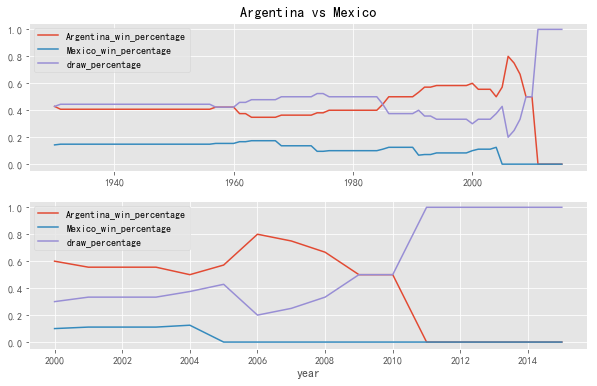

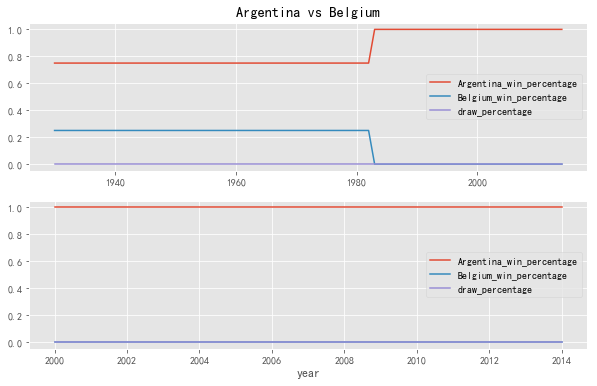

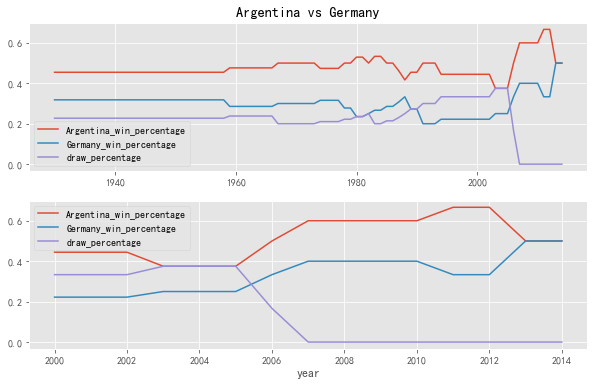

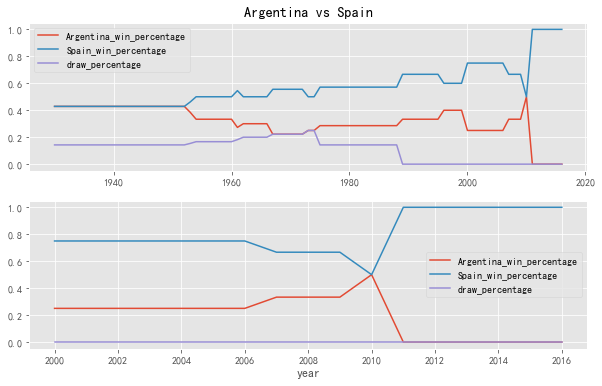

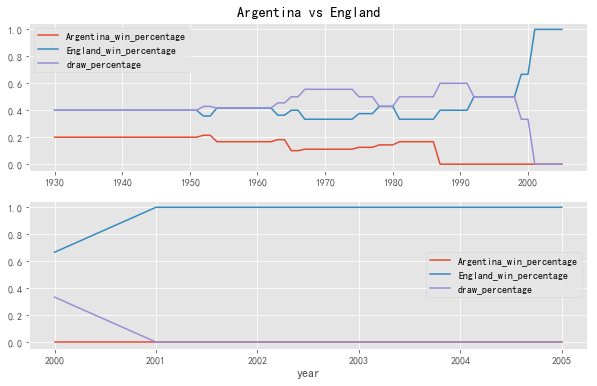

In [178]:
team_A = 'Argentina'

for team in [ 'Mexico','Belgium','Germany','Spain','England']:
    team_B = team

    f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
    ax1, ax2 = axes.ravel()

    team_plot(df,1930,2016,team_A,team_B,ax1)
    ax1.set_xlabel('')
    team_plot(df,2000,2016,team_A,team_B,ax2)
    ax2.set_title('')

    plt.show()

### 墨西哥 vs 4支球队

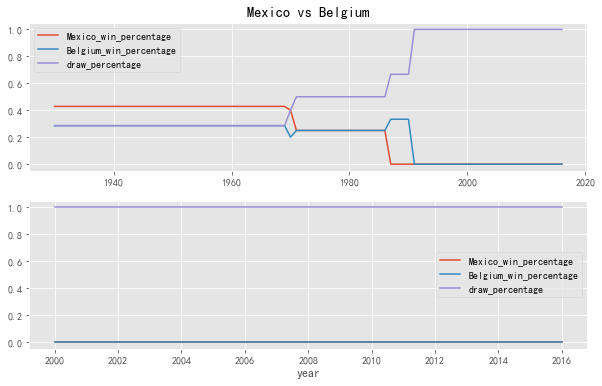

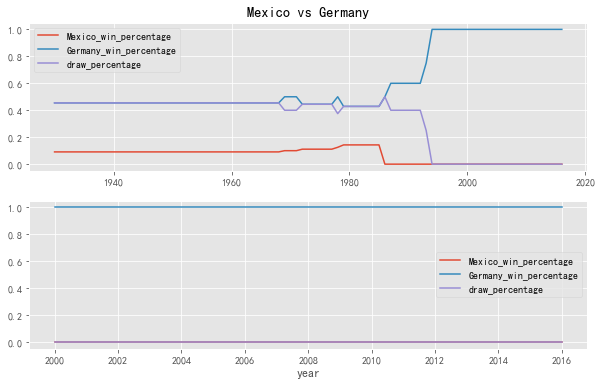

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


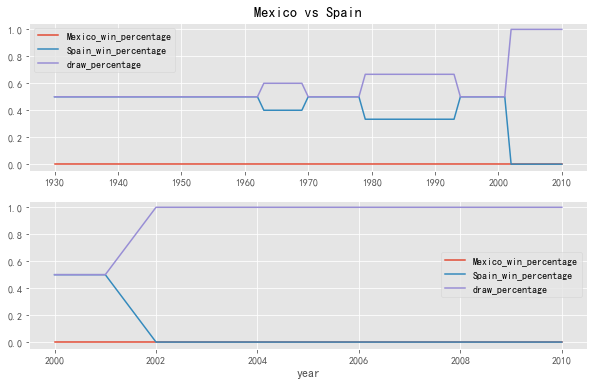

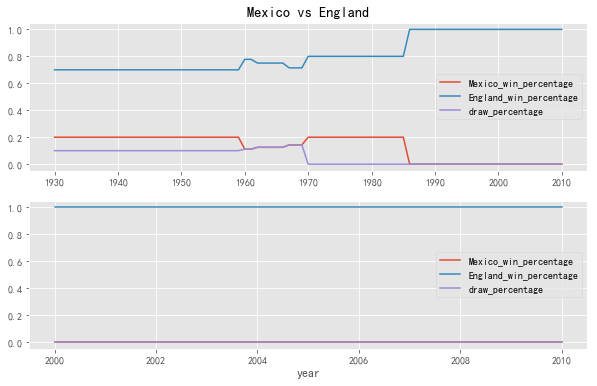

In [179]:
team_A = 'Mexico'

for team in [ 'Belgium','Germany','Spain','England']:
    team_B = team

    f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
    ax1, ax2 = axes.ravel()

    team_plot(df,1930,2016,team_A,team_B,ax1)
    ax1.set_xlabel('')
    team_plot(df,2000,2016,team_A,team_B,ax2)
    ax2.set_title('')

    plt.show()

### 比利时 vs 3支球队

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


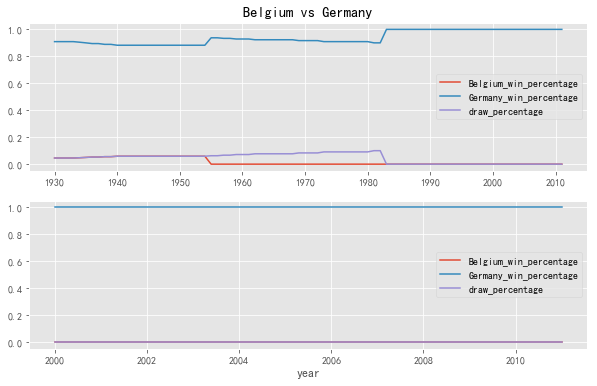

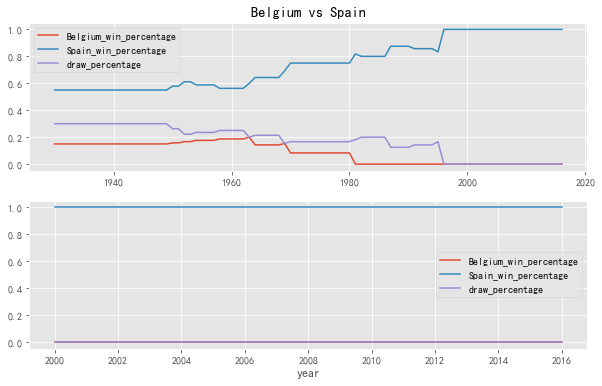

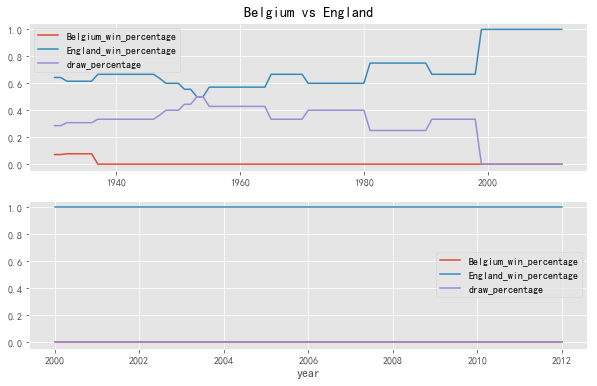

In [180]:
team_A = 'Belgium'

for team in [ 'Germany','Spain','England']:
    team_B = team

    f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
    ax1, ax2 = axes.ravel()

    team_plot(df,1930,2016,team_A,team_B,ax1)
    ax1.set_xlabel('')
    team_plot(df,2000,2016,team_A,team_B,ax2)
    ax2.set_title('')

    plt.show()

### 德国 vs 2支球队

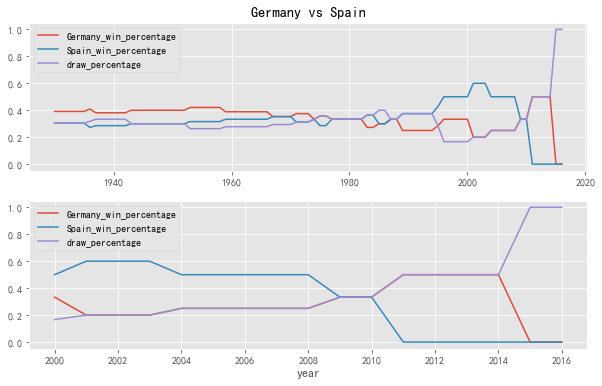

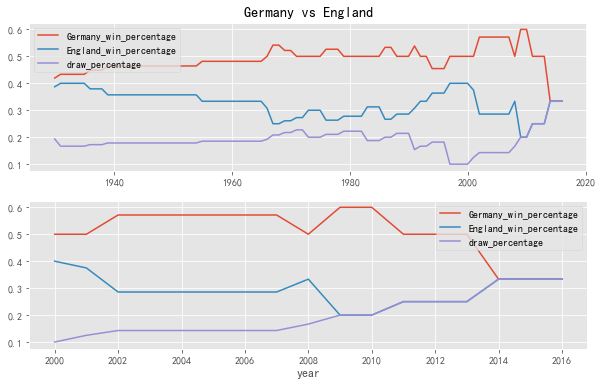

In [181]:
team_A = 'Germany'

for team in [ 'Spain','England']:
    team_B = team

    f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
    ax1, ax2 = axes.ravel()

    team_plot(df,1930,2016,team_A,team_B,ax1)
    ax1.set_xlabel('')
    team_plot(df,2000,2016,team_A,team_B,ax2)
    ax2.set_title('')

    plt.show()

### 西班牙 vs 英国

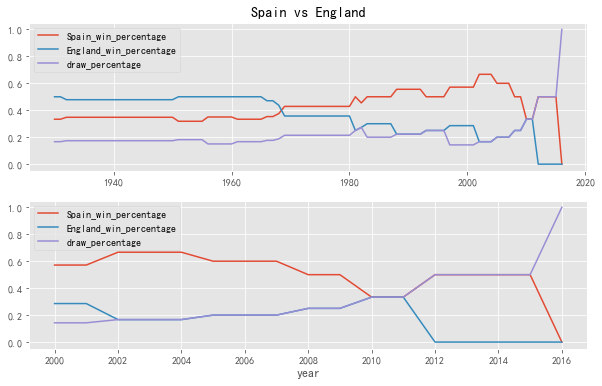

In [182]:
team_A = 'Spain'

for team in [ 'England']:
    team_B = team

    f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
    ax1, ax2 = axes.ravel()

    team_plot(df,1930,2016,team_A,team_B,ax1)
    ax1.set_xlabel('')
    team_plot(df,2000,2016,team_A,team_B,ax2)
    ax2.set_title('')

    plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


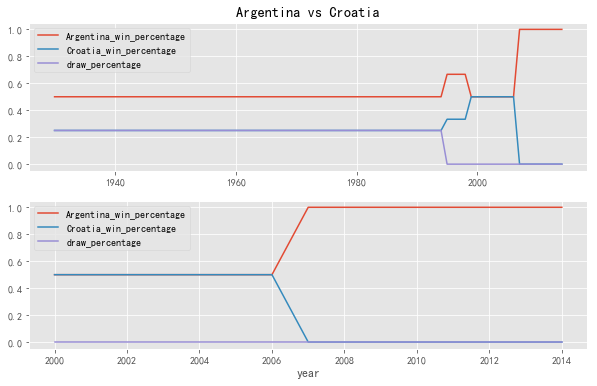

In [183]:
# team_list = ['Russia', 'Germany', 'Brazil', 'Portugal', 'Argentina', 'Belgium', 'Poland', 'France', 
#              'Spain', 'Peru', 'Switzerland', 'England', 'Colombia', 'Mexico', 'Uruguay', 'Croatia',
#             'Denmark', 'Iceland', 'Costa Rica', 'Sweden', 'Tunisia', 'Egypt', 'Senegal', 'Iran',
#             'Serbia', 'Nigeria', 'Australia', 'Japan', 'Morocco', 'Panama', 'Korea Republic', 'Saudi Arabia']

team_A = 'Argentina'
team_B = 'Croatia'

f, axes = plt.subplots(figsize=(6,12), ncols=1, nrows=2)
ax1, ax2 = axes.ravel()

team_plot(df,1930,2016,team_A,team_B,ax1)
ax1.set_xlabel('')
team_plot(df,2000,2016,team_A,team_B,ax2)
ax2.set_title('')

plt.show()